<a href="https://colab.research.google.com/github/SidU/LLMs-from-scratch/blob/main/LinearLayerIntuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔢 Understanding Linear Layers in PyTorch
## What is a Linear Layer?
A **linear layer** in a neural network applies the transformation:

$Y = XW + b$

where:
- **X** = Input features (batch of data).
- **W** = Weight matrix (learned parameters).
- **b** = Bias vector (optional, also learned).
- **Y** = Transformed output.

### ✨ What We Will Do in This Notebook
✅ Define a **linear layer in PyTorch**  
✅ **Manually compute the transformation** step-by-step  
✅ **Verify results using PyTorch**  
✅ **Visualize how a linear transformation works**


# Define a simple linear layer in PyTorch

In [2]:
import torch
import torch.nn as nn

# Define a Linear Layer (2 input features → 3 output neurons)
linear_layer = nn.Linear(in_features=2, out_features=3)

# Check the shape of the weight matrix
print("Weight Matrix Shape:", linear_layer.weight.shape)  # Expected: (3,2)


Weight Matrix Shape: torch.Size([3, 2])


# Section 3: Manually Set Weights and Compute Output



In [4]:
import torch
import torch.nn as nn

# Define Linear Layer (2 input features → 3 output neurons)
linear_layer = nn.Linear(in_features=2, out_features=3)

# Define input tensor (1 sample, 2 features)
X = torch.tensor([[1.0, 2.0]])

# Manually set weights and bias for clear understanding
with torch.no_grad():
    linear_layer.weight = nn.Parameter(torch.tensor([[0.5, 1.0],  # Neuron 1
                                                     [0.2, -0.3], # Neuron 2
                                                     [-0.5, 0.8]])) # Neuron 3
    linear_layer.bias = nn.Parameter(torch.tensor([0.1, -0.2, 0.3]))

# Compute output
output = linear_layer(X)

# Print input, weights, bias, and output with .detach() to remove computation graph dependency
print("Input (X):", X.numpy())
print("Weights (W):", linear_layer.weight.detach().numpy())
print("Bias (b):", linear_layer.bias.detach().numpy())
print("Output (Y):", output.detach().numpy())


Input (X): [[1. 2.]]
Weights (W): [[ 0.5  1. ]
 [ 0.2 -0.3]
 [-0.5  0.8]]
Bias (b): [ 0.1 -0.2  0.3]
Output (Y): [[ 2.6       -0.6        1.4000001]]


## 🤔 Why Is the Weight Matrix (3×2) Instead of (2×3)?
Many people expect **2 rows and 3 columns** instead of **3 rows and 2 columns**.
### But actually:
- Each **row corresponds to an output neuron**.
- Each **column corresponds to an input feature**.

#### **Matrix Multiplication Step:**
We compute:
$
Y = XW^T + b
$

For our input:
$
X = [1.0, 2.0]
$

**Step 1: Compute Weighted Sum**


In [5]:
# Manually compute Y = XW^T + b
W = linear_layer.weight.detach().numpy()
b = linear_layer.bias.detach().numpy()

Y_manual = X.numpy().dot(W.T) + b

# Print manual computation vs. PyTorch output
print("Manually Computed Output:", Y_manual)
print("PyTorch Output:", linear_layer(X).detach().numpy())

Manually Computed Output: [[ 2.6       -0.6        1.4000001]]
PyTorch Output: [[ 2.6       -0.6        1.4000001]]


# Visualizing a linear transformation

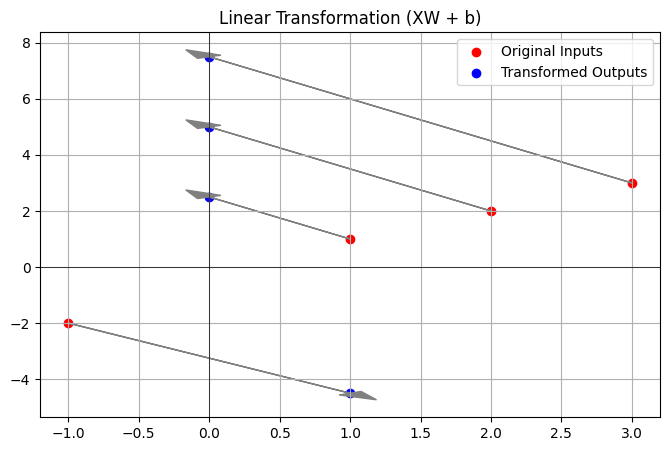

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D space
X_vals = np.array([[1, 1], [2, 2], [3, 3], [-1, -2]])
W_vals = np.array([[1, -1], [0.5, 2]])
b_vals = np.array([0, 0])

# Compute transformed points
Y_vals = X_vals @ W_vals.T + b_vals

# Plot original points
plt.figure(figsize=(8, 5))
plt.scatter(X_vals[:, 0], X_vals[:, 1], color="red", label="Original Inputs")

# Plot transformed points
plt.scatter(Y_vals[:, 0], Y_vals[:, 1], color="blue", label="Transformed Outputs")

# Draw arrows to show transformation
for i in range(len(X_vals)):
    plt.arrow(X_vals[i, 0], X_vals[i, 1],
              Y_vals[i, 0] - X_vals[i, 0], Y_vals[i, 1] - X_vals[i, 1],
              color="gray", head_width=0.2)

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Linear Transformation (XW + b)")
plt.show()


## 🔥 What We Learned
✅ A **linear layer** applies the transformation: **Y = XW + b**  
✅ PyTorch handles this automatically using `nn.Linear(in_features, out_features)`.  
✅ We **manually computed the transformation** step-by-step.  
✅ We **visualized how linear transformations affect inputs.**  

## 🚀 Next Steps
Try experimenting by:
- Changing `W` and `b` to see how transformations affect outputs.
- Using a **larger dataset** to explore projections in **higher dimensions**.
